# Engineering Hydrology Interpolation and Calculation Code
### Caclulation of Potential Evapotranspiration
#### Ashim Paudel (077bce021)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

: 

In [3]:
#reading datas from excel file
data_ew = pd.read_excel("hydrology.xlsx",sheet_name=0)
data_ha = pd.read_excel("hydrology.xlsx", sheet_name=1)
data_n = pd.read_excel("hydrology.xlsx", sheet_name=2)
data_airport = pd.read_excel("hydrology.xlsx", sheet_name=3)

In [4]:
data_ew

,Temp,ew,A
0,0.0,4.58,0.30
1,5.0,6.54,0.45
2,7.5,7.78,0.54
3,10.0,9.21,0.60
4,12.5,10.87,0.71
5,15.0,12.79,0.80
6,17.5,15.00,0.95
7,20.0,17.54,1.05
8,22.5,20.44,1.24
9,25.0,23.76,1.40


In [5]:
data_ha
#data for Ha

,lat,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,0,14.5,15.0,15.2,14.7,13.9,13.4,13.5,14.2,14.9,15.0,14.6,14.3,14.433333
1,10,12.8,13.9,14.8,15.2,15.0,14.8,14.8,15.0,14.9,14.1,13.1,12.4,14.233333
2,20,10.8,12.3,13.9,15.2,15.7,15.8,15.7,15.3,14.4,12.9,11.2,10.3,13.625000
3,30,8.5,10.5,12.7,14.8,16.0,16.5,16.2,15.3,13.5,11.3,9.1,7.9,12.691667
4,40,6.0,8.3,11.0,13.9,15.9,16.7,16.3,14.8,12.2,9.3,6.7,5.4,11.375000
5,50,3.6,5.9,9.1,12.7,15.4,16.7,16.1,13.9,10.5,7.1,4.3,3.0,9.858333


In [6]:
data_n
#data for N

,lat,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,0,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.1,12.100000
1,10,11.6,11.8,12.1,12.4,12.6,12.7,12.6,12.4,12.9,11.9,11.7,11.5,12.183333
2,20,11.1,11.5,12.0,12.6,13.1,13.3,13.2,12.8,12.3,11.7,11.2,10.9,12.141667
3,30,10.4,11.1,12.0,12.9,13.7,14.1,13.9,13.2,12.4,11.5,10.6,10.2,12.166667
4,40,9.6,10.7,11.9,13.2,14.4,15.0,14.7,13.8,12.5,11.2,10.0,9.4,12.200000
5,50,8.6,10.1,11.8,13.8,15.4,16.4,16.0,14.5,12.7,10.8,9.1,8.1,12.275000


In [7]:
data_airport
#airport data

,Parameter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,Temperature,9.45,11.2,15.5,19.2,21.6,23.2,23.4,23.3,22.0,19.0,14.1,10.2,17.679167
1,RH,76.00,57.0,45.0,35.0,43.0,77.0,80.0,84.0,77.0,74.0,71.0,65.0,65.333333
2,wind speed,1.30,2.2,2.2,2.8,2.8,3.3,2.3,2.4,1.5,1.3,1.8,1.4,2.108333
3,actual sunshine in hrs(n),8.00,8.5,9.5,9.4,10.5,11.5,12.0,11.0,11.2,10.0,9.5,9.0,10.008333


In [8]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Avg"]

In [9]:
#initializing constant and known values
L = 27.7 #latitude in decimal degrees
Rl = 1336 #known elevation
r = .22 #albedo constant
a = .29 * np.cos(np.radians(L)) #constant
b = .52 #constant
sigma = 2.01E-9 #stefan's constant
gamma = .49 #psychrometric constant .49 mm of mercury

#get monthly data of relative humidity , wind speed and sunshine
Ta_months = np.array(data_airport.iloc[0].to_list()[1:])
RH_months = np.array(data_airport.iloc[1].to_list()[1:])
WS_months  = np.array(data_airport.iloc[2].to_list()[1:])
SS_months = np.array(data_airport.iloc[3].to_list()[1:])

In [10]:
#interpolation of the datas
ew_months = []
A_months = []
Ha_months = []
N_months = []

for month in months:
    t = data_airport[month][0]
    t_low = data_ew[["Temp"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    t_high = data_ew[["Temp"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    
    ew_low = data_ew[["ew"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    ew_high = data_ew[["ew"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    ew = ew_low + (ew_high-ew_low)*(t-t_low)/(t_high-t_low)
    ew_months.append(ew)
    
    a_low = data_ew[["A"][0]][(data_ew["Temp"]<=t)].to_list()[-1]
    a_high = data_ew[["A"][0]][(data_ew["Temp"]>=t)].to_list()[0]
    a_req = a_low + (a_high-a_low)*(t-t_low)/(t_high-t_low)
    A_months.append(a_req)
    
    lat_low = data_ha["lat"][data_ha["lat"]<=L].to_list()[-1]
    lat_high = data_ha["lat"][data_ha["lat"]>=L].to_list()[0]
    
    ha_low = data_ha[month][data_ha["lat"]<=L].to_list()[-1]
    ha_high = data_ha[month][data_ha["lat"]>=L].to_list()[0]
    ha = ha_low + (ha_high-ha_low)*(L-lat_low)/(lat_high-lat_low)
    Ha_months.append(ha)
    
    N_low = data_n[month][data_n["lat"]<=L].to_list()[-1]
    N_high = data_n[month][data_n["lat"]>=L].to_list()[0]   
    N = N_low + (N_high-N_low)*(L-lat_low)/(lat_high-lat_low)
    N_months.append(N)

print("The interpolated datas are as follows:")
print("ew =", ew_months)
print("A =", A_months)
print("Ha =",Ha_months)
print("N =", N_months)

ew_months = np.array(ew_months)
A_months = np.array(A_months)
Ha_months =np.array(Ha_months)
N_months = np.array(N_months)

The interpolated datas are as follows:
ew = [8.8954, 10.0068, 13.232, 16.7272, 19.396, 21.369600000000002, 21.6352, 21.5024, 19.86, 16.524, 12.098799999999999, 9.3428, 15.18203333333333]
A = [0.5868, 0.6527999999999999, 0.8300000000000001, 1.018, 1.1716000000000002, 1.2848, 1.2975999999999999, 1.2912, 1.202, 1.01, 0.7676000000000001, 0.6087999999999999, 0.9571666666666665]
Ha = [9.029, 10.914, 12.975999999999999, 14.892000000000001, 15.931, 16.339, 16.085, 15.3, 13.707, 11.668000000000001, 9.583, 8.452, 12.906333333333334]
N = [10.561, 11.192, 12.0, 12.831, 13.562, 13.916, 13.739, 13.107999999999999, 12.377, 11.546, 10.738, 10.360999999999999, 12.160916666666667]


In [11]:
ea_months = ew_months*RH_months/100 #calculating value of ea from ew
n_by_N = SS_months/N_months  #calculating n/N
sT4 = sigma*(Ta_months+273)**4   #calculating sigma * T^4 for each months
u2 = WS_months/1.94384*86400/1000

Hn = Ha_months*(1-r)*(a+b*n_by_N)-sT4*(0.56-0.092*np.sqrt(ea_months))*(0.1+0.9*n_by_N)
Ea = .35*(1+u2/160)*(ew_months-ea_months)
PET = (A_months * Hn + Ea * gamma)/(A_months + gamma)

In [12]:
interpolated_data = {months[n]:[ew_months[n], A_months[n], Ha_months[n], N_months[n]] for n in range(len(months))}
df_intp = pd.DataFrame(interpolated_data)
df_intp.to_excel("interpolated.xlsx")

In [13]:
final_data = {months[n]:[ew_months[n], A_months[n], Ha_months[n], N_months[n], ea_months[n], 
                sT4[n], Hn[n], Ea[n], PET[n]] for n in range(len(months))}

final_df = pd.DataFrame(final_data)
col_1 = ["ew", "A", "Ha", "N", "ea", "σT^4", "Hn", "Ea", "PET"]
final_df.insert(0, "Params\Years", col_1, True)

In [14]:
final_df

,Params\Years,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,ew,8.895400,10.006800,13.232000,16.727200,19.396000,21.369600,21.635200,21.502400,19.860000,16.524000,12.098800,9.342800,15.182033
1,A,0.586800,0.652800,0.830000,1.018000,1.171600,1.284800,1.297600,1.291200,1.202000,1.010000,0.767600,0.608800,0.957167
2,Ha,9.029000,10.914000,12.976000,14.892000,15.931000,16.339000,16.085000,15.300000,13.707000,11.668000,9.583000,8.452000,12.906333
3,N,10.561000,11.192000,12.000000,12.831000,13.562000,13.916000,13.739000,13.108000,12.377000,11.546000,10.738000,10.361000,12.160917
4,ea,6.760504,5.703876,5.954400,5.854520,8.340280,16.454592,17.308160,18.062016,15.292200,12.227760,8.590148,6.072820,9.918928
5,σT^4,12.792705,13.112707,13.924491,14.652675,15.140040,15.471637,15.513467,15.492541,15.222435,14.612599,13.656167,12.929123,14.349993
6,Hn,1.374246,2.051717,2.969591,3.653572,4.642910,6.310224,6.483196,6.032564,4.988905,3.373228,1.804251,0.870915,3.632730
7,Ea,1.017063,2.426447,4.103886,6.765467,6.879362,3.297281,2.482118,2.006957,2.264922,2.046726,1.842093,1.589610,2.920990
8,PET,1.211709,2.212390,3.390655,4.664731,5.302432,5.478388,5.386458,4.925138,4.200045,2.939904,1.818995,1.191411,3.391740


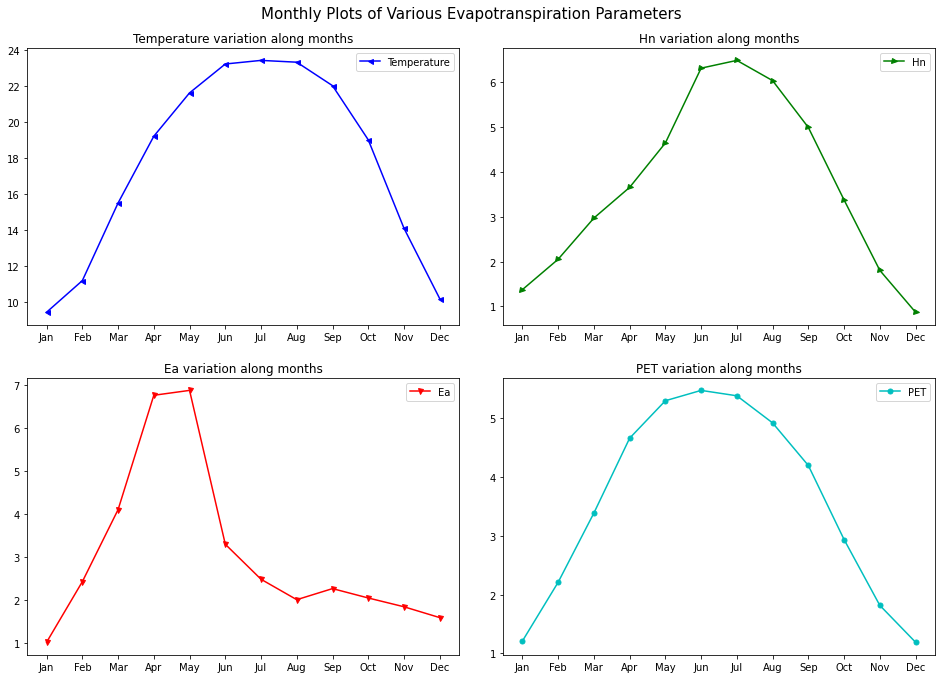

In [19]:
fig = plt.figure("Monthly Plots of various Parameters", figsize=(14,10))#allots total size of area where plots can be made
axes = list(range(4)) #to store each axes object
to_plot = {"Temperature":Ta_months[:-1], "Hn":Hn[:-1], "Ea":Ea[:-1], "PET":PET[:-1]}

for (n,(k,v)) in enumerate(to_plot.items()):
    axes[n]=fig.add_subplot(int(f"22{n+1}"))
    lines = axes[n].plot(months[:-1], v, label=k, c='bgrcmykbg'[n], marker="<>vo"[n], ms=5)
    axes[n].set_title(f"{k} variation along months")
    axes[n].legend(loc="upper right")

fig.tight_layout(pad=4, w_pad=3, h_pad=2) #to ensure good spacing of all figures
fig.suptitle(r"Monthly Plots of Various Evapotranspiration Parameters", fontsize = 15)
plt.show()